# Imports and utils
Here a data class for the problem configurations, just to modify all in a single place

Some wrapper function for almost every np unary and binary functions

I've divided operators in groups too try different configurations, here there are the best ones, found selecting the operations most used running with all selected

In [31]:
import gxgp
from gxgp import *
import numpy as np  
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import re
import os
from dataclasses import dataclass
from typing import List, Callable
from mpl_toolkits.mplot3d import Axes3D

# Fix for NumPy 2.0 compatibility
if not hasattr(np, 'alltrue'):
    np.alltrue = np.all

# Configure PATH to include Graphviz for visualization
os.environ['PATH'] += r';C:\Program Files\Graphviz\bin'

@dataclass
class ProblemConfiguration:
    operators: List[Callable]
    population: int
    newGenerations: int
    resize: int
    offspringSize: int
    individualSize: int
    tournamentSize: int
    crossoverRate: float
    mutationRate: float
      

#Trigonometric functions
def sin(x): return np.sin(x)
def cos(x): return np.cos(x)
def tan(x): return np.tan(x)
def arcsin(x): return np.arcsin(x)
def arccos(x): return np.arccos(x)
def arctan(x): return np.arctan(x)
#Hyperbolic functions
def sinh(x): return np.sinh(x)
def cosh(x): return np.cosh(x)
def tanh(x): return np.tanh(x)
def arcsinh(x): return np.arcsinh(x)
def arccosh(x): return np.arccosh(x)
def arctanh(x): return np.arctanh(x)
#Rounding functions
def rint(x): return np.rint(x)
def floor(x): return np.floor(x)
def ceil(x): return np.ceil(x)
def trunc(x): return np.trunc(x)
#Exponential and logarithmic functions
def exp(x): return np.exp(x)
def log(x): return np.log(x)
# Basic arithmetic operations
def add(x, y): return np.add(x, y)
def reciprocal(x): return np.reciprocal(x)
def positive(x): return np.positive(x)
def negative(x): return np.negative(x)
def multiply(x, y): return np.multiply(x, y)
def divide(x, y): return np.divide(x, y)
def power(x, y): return np.power(x,y)
def subtract(x, y): return np.subtract(x, y)
def mod(x, y): return np.mod(x, y)
#Extrema finding functions
def maximum(x, y): return np.maximum(x, y)
def minimum(x, y): return np.minimum(x, y)
#Miscellaneous functions
def sqrt(x): return np.sqrt(x)
def cbrt(x): return np.cbrt(x)
def square(x): return np.square(x)
def abs(x): return np.abs(x)
def sign(x): return np.sign(x)

operators = [sin, cos, tan, arcsin, arccos, arctan,
             sinh, cosh, tanh, arcsinh, arccosh, arctanh,
             rint, floor, ceil, trunc,
             exp,log,
             add, reciprocal, positive, negative, multiply, divide, power, subtract, mod,
             maximum, minimum,
             sqrt, cbrt, square, abs, sign]
arith_core = [add, subtract, multiply]
trig_basic = [sin, cos]
trig_full  = [tan, arcsin, arccos, arctan]
hyper      = [sinh, cosh, tanh, arcsinh, arccosh, arctanh]
exp_log    = [exp, log]
rounding   = [rint, floor, ceil, trunc]
extrema    = [maximum, minimum]
roots_abs  = [sqrt, cbrt, square, abs]
sign_ops   = [positive, negative, sign]
div_pow_mod= [divide, power, mod, reciprocal]

prob0_subset = arith_core + trig_basic

prob1_subset = arith_core + trig_basic

prob2_subset = arith_core + trig_basic + [sign]

prob3_subset = arith_core + trig_basic + trig_full + hyper + roots_abs + div_pow_mod + rounding

prob4_subset = arith_core + trig_basic + div_pow_mod

prob5_subset = arith_core + trig_basic 

prob6_subset = arith_core + trig_basic

prob7_subset = arith_core + trig_basic + div_pow_mod + exp_log + rounding + sign_ops + roots_abs + hyper + trig_full

prob8_subset = arith_core + trig_basic + div_pow_mod + exp_log + rounding + sign_ops + roots_abs + hyper + trig_full

Wrapper map to translate the wrapper names into np functions in the final expression

In [32]:
WRAPPER_MAP = {
    # Trigonometric
    "sin": "np.sin", "cos": "np.cos", "tan": "np.tan",
    "arcsin": "np.arcsin", "arccos": "np.arccos", "arctan": "np.arctan",
    # Hyperbolic
    "sinh": "np.sinh", "cosh": "np.cosh", "tanh": "np.tanh",
    "arcsinh": "np.arcsinh", "arccosh": "np.arccosh", "arctanh": "np.arctanh",
    # Rounding
    "rint": "np.rint", "floor": "np.floor", "ceil": "np.ceil", "trunc": "np.trunc",
    # Exp/log
    "exp": "np.exp", "log": "np.log",
    # Arithmetic
    "add": "np.add", "reciprocal": "np.reciprocal", "positive": "np.positive",
    "negative": "np.negative", "multiply": "np.multiply", "divide": "np.divide",
    "power": "np.power", "subtract": "np.subtract", "mod": "np.mod",
    # Extrema
    "maximum": "np.maximum", "minimum": "np.minimum",
    # Misc
    "sqrt": "np.sqrt", "cbrt": "np.cbrt", "square": "np.square",
    "abs": "np.abs", "sign": "np.sign"
}

def translate_expression(expr: str) -> str:
    expr = re.sub(r'([a-z])(\d+)', r'\1[\2]', expr)

    for k, v in WRAPPER_MAP.items():
        expr = re.sub(rf'\b{k}\b', v, expr)

    return expr

This config values are the default ones, some tweeks are needed to better perform with some problems, but this default values are still valid choices

In [33]:
selected = 1

problem_configs = {
    1: ProblemConfiguration(prob1_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    2: ProblemConfiguration(prob2_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    3: ProblemConfiguration(prob3_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    4: ProblemConfiguration(prob4_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    5: ProblemConfiguration(prob5_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    6: ProblemConfiguration(prob6_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    7: ProblemConfiguration(prob7_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
    8: ProblemConfiguration(prob8_subset, 100,  10000, 1, 50,  10,  10, 0.5, 0.5),
}
config = problem_configs[selected]


Loading data there is the possibility to shrink the dataset maintaining the distribution to speedup computation if needed

In [34]:
problem = np.load(f'../data/problem_{selected}.npz')
x = problem['x']
y = problem['y']

# Basic data checks
if not np.all(np.isfinite(x)) or not np.all(np.isfinite(y)):
    raise ValueError('Non-finite values detected in data')

step = config.resize
truth = y[::step]
x = x[:, ::step]

gp = gxgp.DagGP(
    operators=config.operators,
    variables=x.shape[0],
    constants=np.linspace(-5, 5, 500),
)

fitness funtion is very simple and just adds a penalty on the mse based on expression lenght to avoid expressions to became enormous

In [35]:
def fitness(individual):
    return (-gp.mse(individual, x, truth, variable_names=[f'x{i}' for i in range(x.shape[0])])*(1 + len(individual)/2) , len(individual))

def tournament_selection(population):
    tournament = np.random.choice(population, config.tournamentSize)
    return max(tournament, key=lambda x: x.fitness)


# Eolutionary loop

In [36]:
population = [gp.create_individual(config.individualSize) for _ in tqdm(range(config.population))]
for i in population:
    i.fitness = fitness(i)

patience = 500
best_fitness = float('-inf')
patience_counter = 0
last_best_individual = None
fitness_history = []
mse_history = []


MAX_NODES = 100

def shrink(ind):
    if len(ind) > MAX_NODES:
        ind = shrink_mutation(ind, x.shape[0], target_fraction=0.25)
    return ind

iterator = range(config.newGenerations)

for generation in iterator:
    offspring = []
    for _ in range(config.offspringSize):
        parent1 = tournament_selection(population)
        
        if np.random.rand() < config.crossoverRate:
            parent2 = tournament_selection(population)
            child = xover_swap_subtree(parent1, parent2)
            child = shrink(child)
            offspring.append(child)
        else:
            adaptive_rate = config.mutationRate * (generation / config.newGenerations)
            if gxgp_random.random() < adaptive_rate:
                child = random_mutation(parent1, x.shape[0], config.operators, probability=0.1)
            else:
                child = subtree_mutation(parent1, x.shape[0], config.operators)
            
            child = shrink(child)
            offspring.append(child)
    
    for i in offspring:
        i.fitness = fitness(i)
        
    population = sorted(population + offspring, key=lambda x: x.fitness, reverse=True)[:config.population]
    current_best = population[0].fitness[0]
    current_best_individual = population[0]
    fitness_history.append(population[0].fitness)

    current_mse = gp.mse(current_best_individual, x, truth, variable_names=[f'x{i}' for i in range(x.shape[0])])
    mse_history.append(current_mse)
    
    if current_best > best_fitness:
        best_fitness = current_best
        patience_counter = 0
    else:
        patience_counter += 1


    if (generation % 100 == 0) or patience_counter >= patience:
        print(f"Generation {generation}, best fitness: {population[0].fitness}, effective MSE: {current_mse:}, patience: {patience_counter}")
    if patience_counter >= patience:
        print(f"Early stopping at generation {generation} due to convergence")
        break


final_mse = mse_history[-1] if mse_history else gp.mse(population[0], x, truth, variable_names=[f'x{i}' for i in range(x.shape[0])])
print(f"Evolution completed. Best fitness: {population[0].fitness}, Final MSE: {final_mse}")

  0%|          | 0/100 [00:00<?, ?it/s]

Generation 0, best fitness: (np.float64(-0.04842062409719301), 11), effective MSE: 0.00744932678418354, patience: 0
Generation 100, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 98
Generation 200, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 198
Generation 300, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 298
Generation 400, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 398
Generation 500, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 498
Generation 502, best fitness: (np.float64(-1.4251881588465546e-33), 2), effective MSE: 7.125940794232773e-34, patience: 500
Early stopping at generation 502 due to convergence
Evolution completed. Best fitness: (np.float64(-1.4251881588465546e-33), 2), Final MSE: 7

In [37]:
index, max_value = fitness_history.index(max(fitness_history)), max(fitness_history)
print(f"Max fitness value reached at epoch {index}, Max fitness value: {max_value}")

print(translate_expression(population[0].long_name))

Max fitness value reached at epoch 2, Max fitness value: (np.float64(-1.4251881588465546e-33), 2)
np.sin(x[0])


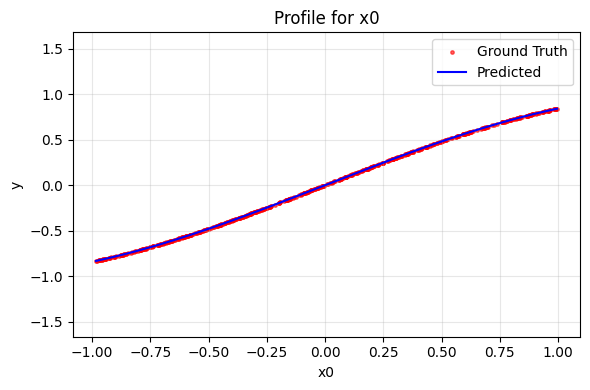

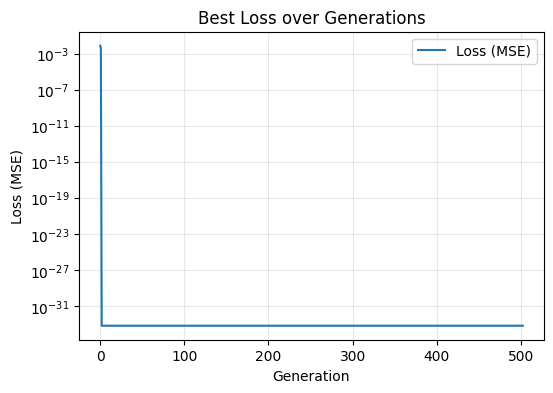

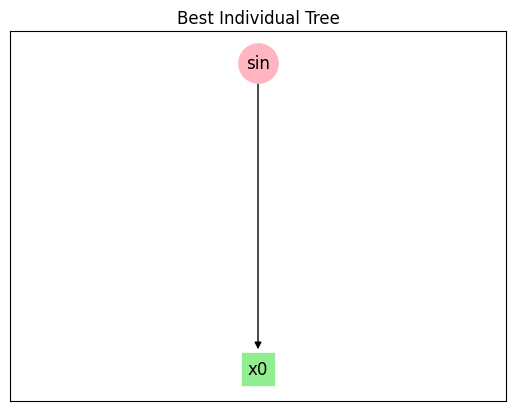

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

directory = f'../results/problem{selected}'
os.makedirs(directory, exist_ok=True)

loss_history = mse_history if 'mse_history' in globals() and len(mse_history) > 0 else [-h[0] for h in fitness_history]

n_vars = x.shape[0]
fig_rows = (n_vars + 1) // 2
fig_cols = min(n_vars, 2)

fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(fig_cols * 6, fig_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

y_min, y_max = min(truth), max(truth)

for i in range(n_vars):
    ax = axes[i]
    x_min, x_max = min(x[i]), max(x[i])
    interval = np.linspace(x_min, x_max, 2000)

    predicted = [population[0](**{f'x{k}': interval[j] if k == i else 0 for k in range(n_vars)}) for j in range(len(interval))]

    ax.scatter(x[i], truth, s=6, c='r', alpha=0.6, label='Ground Truth')
    ax.plot(interval, predicted, c='b', linewidth=1.5, label='Predicted')
    ax.set_title(f'Profile for x{i}')
    ax.set_xlabel(f'x{i}')
    ax.set_ylabel('y')
    ax.set_ylim(2*y_min, 2*y_max)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig(f'{directory}/all_profiles.png', dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(loss_history, label='Loss (MSE)')
plt.title('Best Loss over Generations')
plt.xlabel('Generation')
plt.ylabel('Loss (MSE)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig(f'{directory}/loss_over_generations.png', dpi=150, bbox_inches='tight')
plt.show()

population[0].draw()
plt.title('Best Individual Tree')
plt.savefig(f'{directory}/formula.png', dpi=150, bbox_inches='tight')

if n_vars == 2:
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    x1, x2 = x[0], x[1]
    predicted = [population[0](**{'x0': x1[j], 'x1': x2[j]}) for j in range(len(x1))]

    ax.scatter(x1, x2, truth, c='r', marker='o', s=3, alpha=0.6, label='Ground Truth')
    ax.plot_trisurf(x1, x2, predicted, color='b', alpha=0.4)

    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('y')
    plt.title('3D Prediction Surface')
    plt.savefig(f'{directory}/surface_3d.png', dpi=150, bbox_inches='tight')
    plt.show()